# Sentiment Analysis Using TensorFlow

### Loading the IMDb Dataset

In [2]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv('IMDB Dataset.csv')
df.sample(5)

,review,sentiment
16104,This movie almost has everything. The action i...,positive
17737,I got this movie because I worked at a movie s...,negative
39406,I commend pictures that try something differen...,positive
40778,I can never figure if this is the Artiest Soap...,positive
32482,I saw a screening of this movie last night. I ...,negative


### Data Cleaning and Preprocessing

Text data can be messy and inconsistent, so let’s clean it up. We’ll remove special characters, convert everything to lowercase, and tokenize the text.

Text Cleaning and Tokenization
We’ll use regular expressions to remove unwanted characters and TensorFlow’s Tokenizer to convert text into a format suitable for modeling.

In [4]:
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Function to clean text
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabet characters
    return text.lower().strip()

# Clean the reviews
df['review'] = df['review'].apply(clean_text)

# Tokenization and padding
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['review'])
sequences = tokenizer.texts_to_sequences(df['review'])
padded_sequences = pad_sequences(sequences, maxlen=200)

### Converting Labels to Numeric Format

We need to convert the positive and negative labels into binary values.

In [5]:
# Convert sentiment labels to binary
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Splitting the data into features (X) and labels (y)
X = padded_sequences
y = df['sentiment'].values

### Splitting the Data into Training and Testing Sets

We’ll use an 80:20 split to separate the data into training and testing sets.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the Neural Network with TensorFlow

We’ll create a simple neural network with an Embedding layer, followed by two LSTM layers, and a Dense output layer.

In [7]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=200),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

c:\Users\use\Desktop\ML\Projects\AI-ML-Algorithms\ai-ml-algorithms\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 103s 99ms/step - accuracy: 0.7083 - loss: 0.5272 - val_accuracy: 0.8511 - val_loss: 0.3418
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 206s 206ms/step - accuracy: 0.8817 - loss: 0.3008 - val_accuracy: 0.8608 - val_loss: 0.3270
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 279s 279ms/step - accuracy: 0.9091 - loss: 0.2411 - val_accuracy: 0.8503 - val_loss: 0.3610
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 260s 259ms/step - accuracy: 0.9298 - loss: 0.1895 - val_accuracy: 0.8684 - val_loss: 0.3252
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 255s 255ms/step - accuracy: 0.9397 - loss: 0.1644 - val_accuracy: 0.8652 - val_loss: 0.3403
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 274s 274ms/step - accuracy: 0.9495 - loss: 0.1400 - val_accuracy: 0.8619 - val_loss: 0.3768
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 256s 256ms/step - accuracy: 0.9626 - loss: 0.1095 - val_accuracy: 0.8626 - val_loss: 0.4022
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 127s 127ms/step - acc

### Model Explanation
Embedding Layer: Converts word indices into dense vectors of fixed size (16 dimensions).

LSTM Layers: These layers capture patterns in the text over sequences of words.

Dense Layer: Reduces the dimensionality of the features.

Output Layer: Uses the sigmoid activation function to predict the probability of being positive

### Visualizing Model Performance
We can use Matplotlib to plot the training and validation accuracy over epochs.

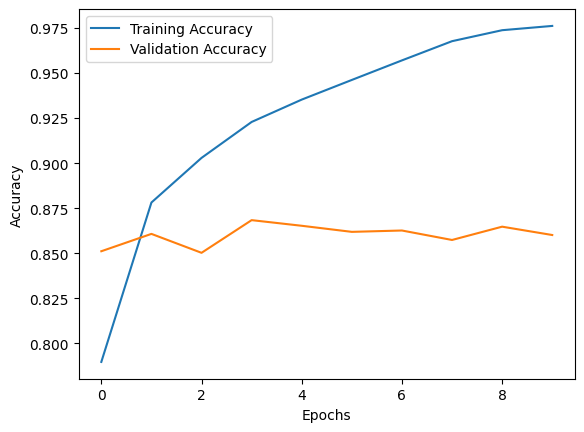

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Evaluating the Model
Let’s evaluate our model on the test data to see how well it generalizes.

In [9]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 84ms/step - accuracy: 0.8585 - loss: 0.5042
Test Accuracy: 0.86


### Making Predictions
We can use our model to predict the sentiment of new movie reviews.

In [10]:
sample_reviews = [
    "I absolutely loved this movie! The plot was thrilling and the characters were so well developed.",
    "The film was a disaster. Poor acting and a predictable storyline."
]

sample_sequences = tokenizer.texts_to_sequences(sample_reviews)
sample_padded = pad_sequences(sample_sequences, maxlen=200)

predictions = model.predict(sample_padded)
print(["Positive" if prob > 0.5 else "Negative" for prob in predictions])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step
['Positive', 'Negative']


## Conclusion

This project demonstrates a comprehensive approach to sentiment analysis on the IMDb movie reviews dataset using deep learning techniques. The dataset, consisting of 50,000 labeled movie reviews, was cleanly preprocessed by removing HTML tags and special characters, converting text to lowercase, and tokenizing to numeric sequences that neural networks can understand.

A neural network model was constructed with an embedding layer to represent words as dense vectors, followed by two LSTM layers that effectively capture temporal dependencies and context in the sequences of words. The final dense layers translate these learned representations into a binary sentiment classification output (positive or negative).

The model was trained with an 80:20 train-test split and showed strong performance across epochs, with validation accuracy closely matching training accuracy, indicating good generalization. Evaluating the model on the test set yielded a high accuracy score, demonstrating its ability to predict sentiment reliably on unseen data.

Furthermore, the model was successfully applied to new sample reviews, correctly classifying them as positive or negative, which illustrates its practical utility.

Overall, this workflow highlights key steps of modern text-based sentiment analysis: rigorous data cleaning, effective sequence modeling via LSTMs, and comprehensive evaluation. The use of deep learning, particularly recurrent neural networks, provides superior capability to understand the nuances of language in movie reviews compared to traditional machine learning approaches. This makes it suitable for real-world applications like social media monitoring, customer feedback analysis, and recommendation systems.

This project exemplifies how deep learning combined with careful preprocessing can deliver robust and interpretable models for natural language understanding tasks.